# Primera Parte Obtención Datos
Primera parte de recolección de datos. El Web Scraping hecho se hace a través de la herramienta BeautifulSoup con la que se recorre la información estática ofrecida por la página analizada en cuestión.

In [ ]:
from bs4 import BeautifulSoup
import networkx as nx
import requests

In [2]:
#Lista de links a visitar
madrid_link1 = 'https://www.metromadrid.es/en/linea/linea-{}'
madrid_link2 = 'https://www.metromadrid.es/en/linea/linea-6-circular'
madrid_link3 = 'https://www.metromadrid.es/en/linea/linea-12-metrosur'
madrid_link4 = 'https://www.metromadrid.es/en/linea/ramal'
madrid_link5 = 'https://www.metromadrid.es/en/linea/ml{}'

In [3]:
#Variable instanciada contenedor del grafo obtenido a partir de la información sacada de los links anteriores
G = nx.Graph()

In [4]:
def addNodesEdgesEstacions(G, estacions):
    previous = ''
    aux = 0
    for i in estacions:
        #print(i.text)
        G.add_node(i.text)
        if aux != 0:
            G.add_edge(i.text, previous)
        aux += 1
        previous = i.text

In [5]:
def obtainPage(G, url):
    page = requests.get(url)
    estacions_html = BeautifulSoup(page.content, 'html.parser')
    estacions = estacions_html.find_all('p', class_ = 'list-line__btn__text')
    addNodesEdgesEstacions(G, estacions)

In [6]:
def recorrerPages(G):
    for iter in [x for x in range(1,12) if x != 6]:
        obtainPage(G, madrid_link1.format(iter))
        
    obtainPage(G, madrid_link2)
    obtainPage(G, madrid_link3)
    obtainPage(G, madrid_link4)
    
    for iter in (1,4):
        obtainPage(G, madrid_link5.format(iter))

In [7]:
#Programa Principal
recorrerPages(G)

# Segunda Parte Obtención Datos
Esta segunda parte de recolección de datos con el Web Scraping se hace con la herramienta Selenium a causa de consultar una web dinámica, por lo que la herramienta primera no nos sirve.

In [8]:
#Imports Necesarios
from selenium import webdriver
import time

In [9]:
#Instacia del webdriver con el navegador Edge utilizando Selenium
driver = webdriver.Edge()

#Página a visitar con el driver iniciado
cercanias_link = 'https://www.renfe.com/es/es/cercanias/cercanias-madrid/lineas'
driver.get(cercanias_link)

In [10]:
def addNodesEdgesEstacionsCercanias(estacions):
    previous = ''
    aux = 0
    for i in estacions:
        nom = i.text.replace('\n', '').replace('·', '')
        G.add_node(nom)
        if aux != 0:
            G.add_edge(nom, previous)
        aux += 1
        previous = nom

In [14]:
def recolectCercanias(tabulador):
    tabulador = driver.find_elements_by_class_name("rf-tab-detail-line__item")

    for i in tabulador:
        i.click()
        time.sleep(1)
        elements = driver.find_elements_by_class_name("rf-list-detail__item-direction")
        addNodesEdgesEstacionsCercanias(elements)

In [15]:
#Llamada al programa Principal
tabulador = driver.find_elements_by_class_name("rf-tab-detail-line__item")
recolectCercanias(tabulador)

# Análisis Del Grafo
El análisis se divide en tres grandes partes. En primer lugar tenemos un análisis general. En segundo lugar tenemos un análisis de los diferentes características y valores que puede dar el grafo, teniendo información del Centrality, Betweenness, Closeness y el PageRank. Finalmente, se hacen diferentes visualizaciones gráficas del grafo.

Información General

In [16]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 328
Number of edges: 380
Average degree:   2.3171


In [17]:
print(nx.is_connected(G))

True


In [18]:
nx.diameter(G)

36

In [19]:
nx.density(G)

0.007085850675020512

In [20]:
nx.transitivity(G)

0.026865671641791045

In [21]:
#Graf conectado por completo, por lo que el número de componentes conexas tiene que ser 1
nx.number_connected_components(G)

1

Índices de Centralidad

In [22]:
#Centrality
degs = nx.centrality.degree_centrality(G)

In [23]:
#Valores de Centralidad ordenados de mayor a menor
import operator
degs_sort = sorted(degs.items(), key=operator.itemgetter(1), reverse=True)
for deg in enumerate(degs_sort):
    print(deg[1][0], ' -> ', degs[deg[1][0]])

Sol  ->  0.024464831804281346
Nuevos Ministerios  ->  0.024464831804281346
Avenida de América  ->  0.021406727828746176
Príncipe Pío  ->  0.021406727828746176
Alonso Martínez  ->  0.01834862385321101
Madrid Atocha Cercanías  ->  0.01834862385321101
Plaza de Castilla  ->  0.01529051987767584
Cuatro Caminos  ->  0.01529051987767584
Ópera  ->  0.01529051987767584
Villaverde Alto  ->  0.01529051987767584
Diego de León  ->  0.01529051987767584
Méndez Álvaro  ->  0.01529051987767584
Bilbao  ->  0.012232415902140673
Tribunal  ->  0.012232415902140673
Gran Vía  ->  0.012232415902140673
Pacífico  ->  0.012232415902140673
Ventas  ->  0.012232415902140673
Manuel Becerra  ->  0.012232415902140673
Goya  ->  0.012232415902140673
Príncipe de Vergara  ->  0.012232415902140673
San Bernardo  ->  0.012232415902140673
Canal  ->  0.012232415902140673
Legazpi  ->  0.012232415902140673
Delicias  ->  0.012232415902140673
Embajadores  ->  0.012232415902140673
Callao  ->  0.012232415902140673
Plaza de España  -

In [24]:
#Nodos con más grado
sorted(degs, key=lambda p: degs[p])[-4:]

['Avenida de América', 'Príncipe Pío', 'Sol', 'Nuevos Ministerios']

In [27]:
#Closeness
close = nx.centrality.closeness_centrality(G)
sorted(close, key=lambda p: close[p])[-4:]

['Recoletos', 'Madrid Atocha Cercanías', 'Nuevos Ministerios', 'Sol']

In [28]:
#Betweenness
betw = nx.centrality.betweenness_centrality(G)
sorted(betw, key=lambda p: betw[p])[-4:]

['Madrid Chamartín', 'Sol', 'Madrid Atocha Cercanías', 'Nuevos Ministerios']

In [29]:
#PageRank
pager = nx.pagerank(G)
sorted(pager, key=lambda p: pager[p])[-4:]

['Avenida de América', 'Príncipe Pío', 'Sol', 'Nuevos Ministerios']

Distribución Grados de los nodos

(array([ 21., 251.,  11.,  33.,   6.,   2.,   2.,   2.]),
 array([0.0030581 , 0.00573394, 0.00840979, 0.01108563, 0.01376147,
        0.01643731, 0.01911315, 0.02178899, 0.02446483]),
 <a list of 8 Patch objects>)

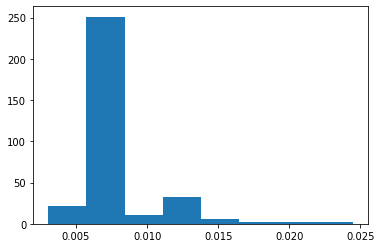

In [25]:
import matplotlib.pylab as plt
%matplotlib inline
plt.hist(degs.values(),bins=8)

Visualización

In [34]:
#Visualización del Grafo con etiquetas
#%matplotlib inline
%matplotlib qt
nx.draw_kamada_kawai(G, with_labels = True)

In [49]:
#Grafo Coloreado
nx.draw(G, with_labels=False, node_color=list(degs.values()), cmap=plt.cm.Blues)